<div><img src="im1.png"height="300" width="900"  ></div>

<h2 style ="color : #2869d2 ; font-size:30px; font-weight:700;  text-align: left;text-decoration: underline;"> Traivailles demandés:</h2>
    
* Appliquer plusieurs algorithmes de bruitage sur une image de votre choix.
* Appliquer un filtre sur chaque résultat obtenue.
* Appliquer la méthode de Cluserting devotre choix sur toutes les images.
* Comparer les résultats.

In [2]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt


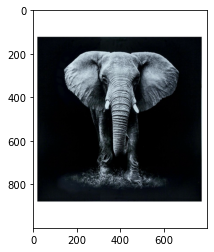

In [42]:
image = cv2.imread('eleph.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('eleph5.jpg', quant)
plt.imshow(image)

cv2.imread('eleph.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
#!pip install opencv-python


<h2 style ="color : #d23c28 ; font-size: 30px; font-weight:700"> 1.Noising Images </h2>


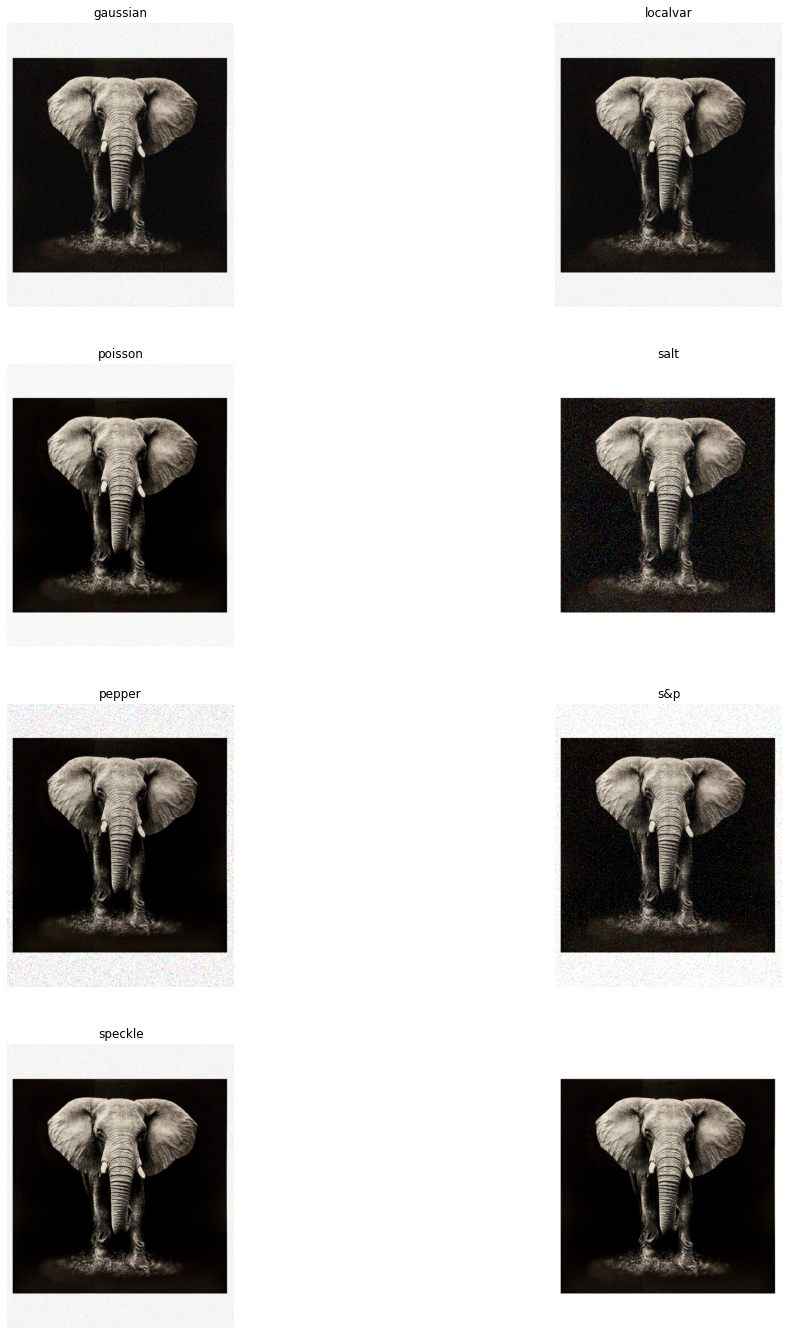

In [46]:
import skimage.io
import matplotlib.pyplot as plt
img_path="eleph.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        
        gimg = (gimg.flatten()*255).reshape(1000,800,3)
        cv2.imwrite(mode+"Noise.jpg", gimg)

    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()



<h2 style ="color : #d23c28 ; font-size: 30px; font-weight:700"> 2.Displaying Images after clustering </h2>

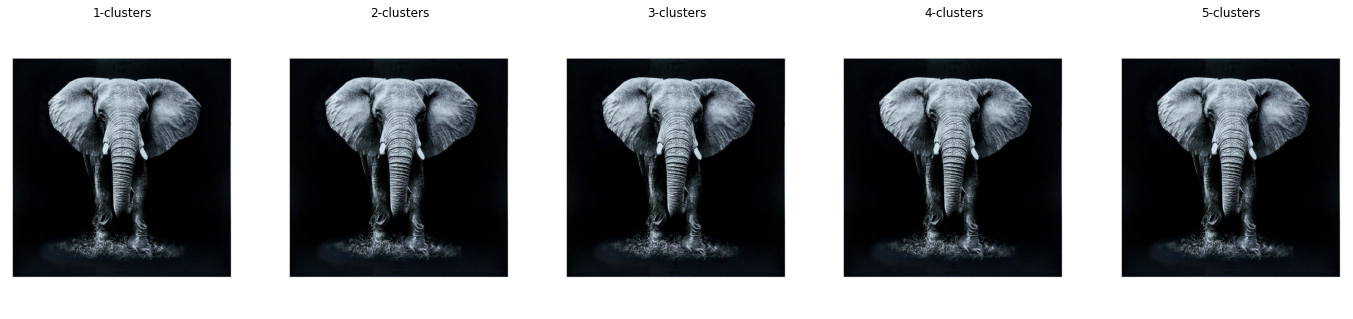

In [48]:
#in this funcition we'll display the images with differnt number of clusters for each (number of classes:nbc)
def plotClusters(img, nbc, r, c, i):
    plt.subplot(r,c,i)
    plt.imshow(img)
    plt.title(nbc+"-clusters")
    plt.axis("off")

plt.figure(figsize=(24,30))
r=1
c=5
img = cv2.imread("eleph.jpg")
img2 = cv2.imread("eleph.jpg")
img3 = cv2.imread("eleph.jpg")
img4 = cv2.imread("eleph.jpg")
img5 = cv2.imread("eleph.jpg")

plotClusters(img, "1", r,c,1)
plotClusters(img2, "2", r,c,2)
plotClusters(img3, "3", r,c,3)
plotClusters(img4, "4", r,c,4)
plotClusters(img5, "5", r,c,5)
plt.show()


<h2 style ="color : #d23c28 ; font-size: 30px; font-weight:700"> 3. Eliminating Noise </h2>

In [67]:
#eliminating noise in the images with the function below:
def plotDenoising(imgName):
    NoisedImg =  cv2.imread(imgName+".jpg")
    NoNoiseImg = cv2.fastNlMeansDenoisingColored(NoisedImg , None, 30.0, 7, 21);
    cv2.imwrite("No"+imgName+".jpg", NoNoiseImg)
    return



<h1 style ="color : #105218 ; font-size: 30px; font-weight:700"> Unnoised Image</h1>

In [50]:
plotDenoising("gaussianNoise")



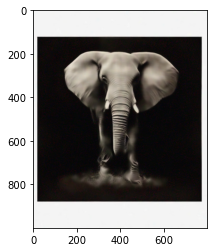

In [53]:
plt.imshow(cv2.imread('NogaussianNoise.jpg'))